In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10, 6

In [2]:
data=pd.read_csv("A:\dataset\\AirPassengers.csv")

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
#parse string to datatime type
data['Month'] = pd.to_datetime(data['Month'],infer_datetime_format=True)
indexedData = data.set_index(['Month'])

In [7]:
from datetime import datetime
indexedData.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


C:\Users\karthick\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


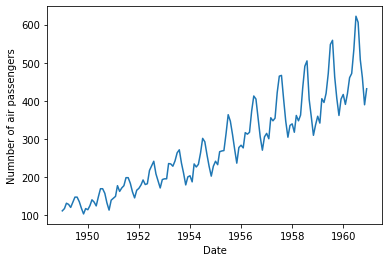

In [8]:
#plot graph
plt.xlabel("Date")
plt.ylabel("Numnber of air passengers")
plt.plot(indexedData)

In [9]:
#Determining rolling statistics
rollmean = indexedData.rolling(window=12).mean()
rollstd = indexedData.rolling(window=12).std()
print(rollmean,rollstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

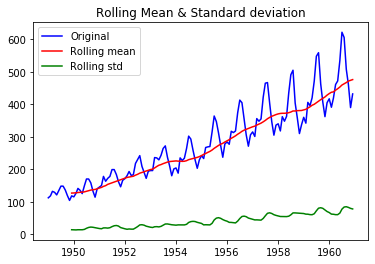

In [10]:
#plot for rolling statistics:
orig = plt.plot(indexedData,color='blue' ,label='Original')
mean = plt.plot(rollmean,color='red', label='Rolling mean')
std = plt.plot(rollstd,color='green',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard deviation')
plt.show(block=False)

In [14]:
#perform dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print("Result pf Dickey-fuller Test:")
dftest = adfuller(indexedData['#Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)

Result pf Dickey-fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical value (1%)            -3.481682
dtype: float64
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
dtype: float64
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


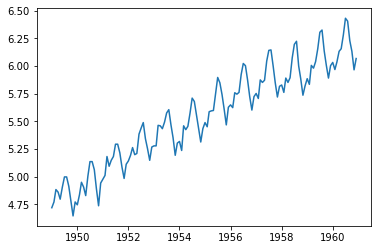

In [15]:
#estimating trend
indexedData_logScale = np.log(indexedData)
plt.plot(indexedData_logScale)

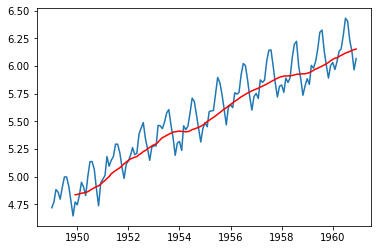

In [16]:
movingAverage = indexedData_logScale.rolling(window=12).mean()
movingstd = indexedData_logScale.rolling(window=12).std()
plt.plot(indexedData_logScale)
plt.plot(movingAverage, color='red')

In [26]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingAveragestd = timeseries.rolling(window=12).std()

    #plot for rolling statistics:
    orig = plt.plot(indexedData,color='blue' ,label='Original')
    mean = plt.plot(rollmean,color='red', label='Rolling mean')
    std = plt.plot(rollstd,color='green',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard deviation')
    plt.show(block=False)

    #perform dickey-fuller test
    print("Result pf Dickey-fuller Test:")
    dftest = adfuller(indexedData['#Passengers'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)

In [27]:
dataset=indexedData_logScale - movingAverage
dataset.head(12)
#Remove nan values
dataset.dropna(inplace=True)
dataset.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


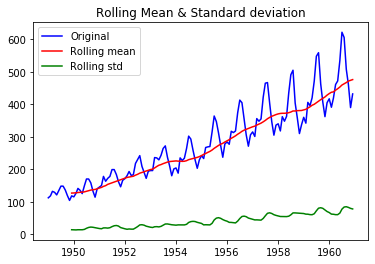

Result pf Dickey-fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


In [28]:
test_stationarity(dataset)

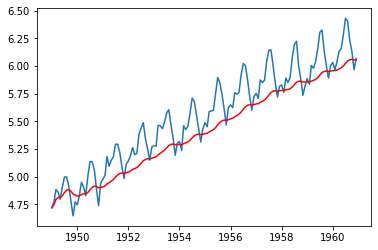

In [29]:
exponentialDecayWeightAverage = indexedData_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedData_logScale)
plt.plot(exponentialDecayWeightAverage, color='red')

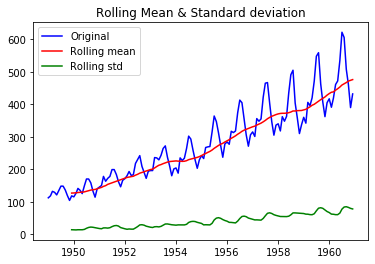

Result pf Dickey-fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


In [30]:
datasetLogScale = indexedData_logScale - exponentialDecayWeightAverage
test_stationarity(datasetLogScale)

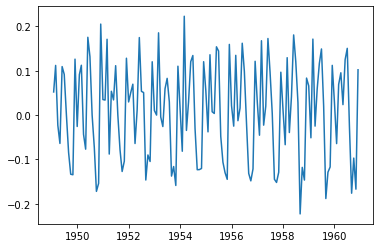

In [31]:
shift= indexedData_logScale - indexedData_logScale.shift()
plt.plot(shift)

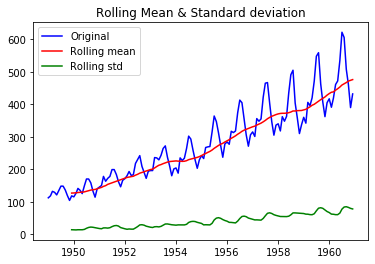

Result pf Dickey-fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


In [32]:
shift.dropna(inplace=True)
test_stationarity(shift)

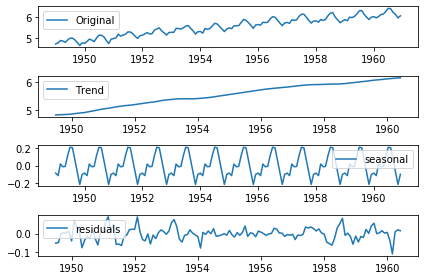

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedData_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexedData_logScale, label="Original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residuals')
plt.legend(loc='best')
plt.tight_layout()


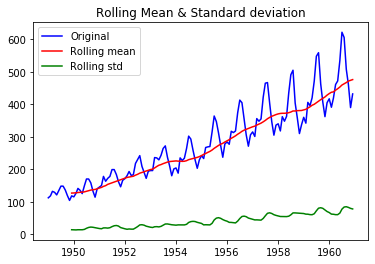

Result pf Dickey-fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


In [38]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

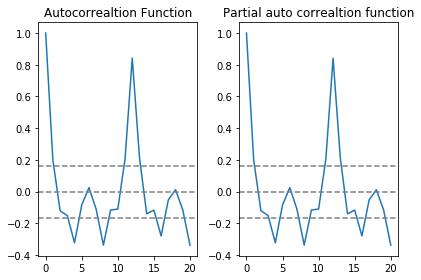

In [44]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(shift, nlags=20)
lag_pacf = pacf(shift, nlags=20, method='ols')

#acf plot
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(shift)),linestyle='--',color='gray')
plt.title("Autocorrealtion Function")

#pacf plot
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(shift)),linestyle='--',color='gray')
plt.title('Partial auto correaltion function')
plt.tight_layout()

C:\Users\karthick\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\karthick\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


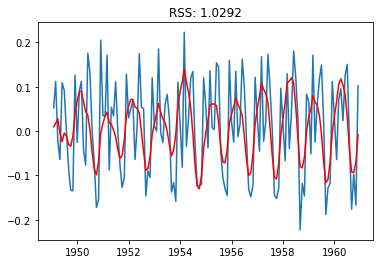

In [46]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(indexedData_logScale,order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(shift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-shift["#Passengers"])**2))
print("Plotting AR model")

C:\Users\karthick\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\karthick\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


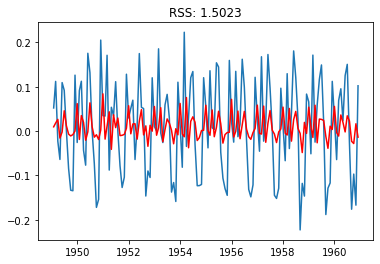

In [47]:
model = ARIMA(indexedData_logScale,order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(shift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-shift["#Passengers"])**2))
print("Plotting AR model")

In [51]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009600
1949-03-01    0.018167
1949-04-01    0.026435
1949-05-01   -0.015768
1949-06-01   -0.002144
dtype: float64


In [54]:
#convert cummulative
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009600
1949-03-01    0.027767
1949-04-01    0.054202
1949-05-01    0.038433
1949-06-01    0.036289
dtype: float64


In [57]:
predictions_ARIMA_log = pd.Series(indexedData_logScale['#Passengers'].ix[0],indexedData_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\karthick\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728099
1949-03-01    4.746265
1949-04-01    4.772700
1949-05-01    4.756932
dtype: float64

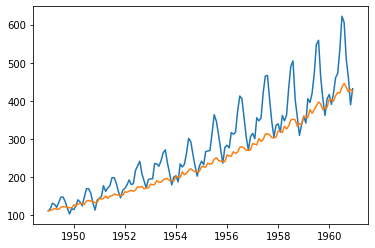

In [58]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedData)
plt.plot(predictions_ARIMA)

In [59]:
indexedData_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


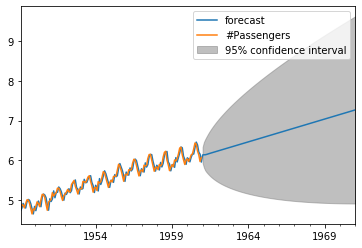

In [61]:
results_AR.plot_predict(1,264)
x=results_AR.forecast(steps=120)

In [62]:
x=results_AR.forecast(steps=120)
x

(array([6.13038724, 6.13635262, 6.13606413, 6.14395847, 6.15486147,
        6.16506278, 6.17457968, 6.18405617, 6.19364117, 6.20325874,
        6.21286527, 6.22246358, 6.23206186, 6.24166154, 6.25126157,
        6.26086143, 6.27046119, 6.28006096, 6.28966075, 6.29926054,
        6.30886033, 6.31846011, 6.3280599 , 6.33765969, 6.34725947,
        6.35685926, 6.36645905, 6.37605884, 6.38565862, 6.39525841,
        6.4048582 , 6.41445799, 6.42405777, 6.43365756, 6.44325735,
        6.45285714, 6.46245692, 6.47205671, 6.4816565 , 6.49125629,
        6.50085607, 6.51045586, 6.52005565, 6.52965544, 6.53925522,
        6.54885501, 6.5584548 , 6.56805459, 6.57765437, 6.58725416,
        6.59685395, 6.60645374, 6.61605352, 6.62565331, 6.6352531 ,
        6.64485289, 6.65445267, 6.66405246, 6.67365225, 6.68325204,
        6.69285182, 6.70245161, 6.7120514 , 6.72165119, 6.73125097,
        6.74085076, 6.75045055, 6.76005034, 6.76965012, 6.77924991,
        6.7888497 , 6.79844949, 6.80804927, 6.81